# Affine transformation Digital Image Processing (IMP 301)
<img src="Screenshot_2024-05-20_233723.png" alt="Topic" width="500" height="800">


In [1]:
import numpy as np              # import numpy sử dụng ma trận 
import matplotlib.pyplot as plt # plot ảnh
from skimage.io import imread   # load ảnh đầu vào
from scipy import ndimage       # sử dụng hàm affine transformation dựng sẵn

### Đọc ảnh từ source

In [2]:
image = imread("Fig0236(a)(letter_T).tif", as_gray=True)

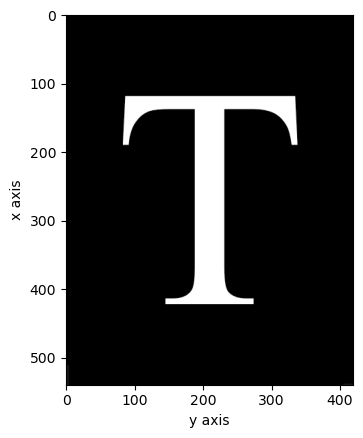

In [3]:
plt.figure(dpi=100)
plt.imshow(image, cmap="gray")
plt.xlabel("y axis")
plt.ylabel("x axis")
plt.show()

### Tạo hàm để show và so sánh original image và transformed image

In [4]:
def show(image, transformedImage):
    
    fig, ax = plt.subplots(nrows=1, ncols=2, dpi=100)
    
    ax[0].set_title('Original Image')
    ax[0].imshow(image, cmap='gray')
    ax[0].set_xlabel('y axis')
    ax[0].set_ylabel('x axis')

    ax[1].set_title('Transformed Image')
    ax[1].imshow(transformedImage, cmap='gray')
    ax[1].set_xlabel('y axis')
    ax[1].set_ylabel('x axis')
    
    fig.tight_layout()
    
    plt.show()

## Identity - Nhận dạng
$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [5]:
matIdentity = np.array([[1,0,0],[0,1,0],[0,0,1]])
matIdentity

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [6]:
imIdentity = ndimage.affine_transform(image, matIdentity)

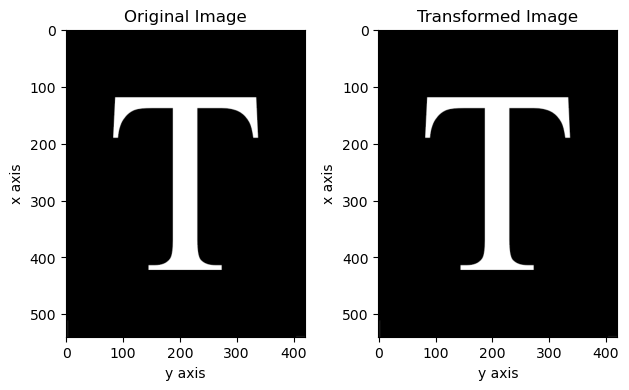

In [7]:
show(image, imIdentity)

## Scale

$$\begin{bmatrix} W & 0 & 0 \\ 0 & H & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

`W` is scale in x-axis

`H` is scale in y-axis

if `W or H < 1`: zoom in the image

if `W or H > 1`: zoom out the image

In [8]:
matScale = np.array([[0.8,0,0],[0,0.8,0],[0,0,1]])
matScale

array([[0.8, 0. , 0. ],
       [0. , 0.8, 0. ],
       [0. , 0. , 1. ]])

In [9]:
imScale = ndimage.affine_transform(image, matScale)

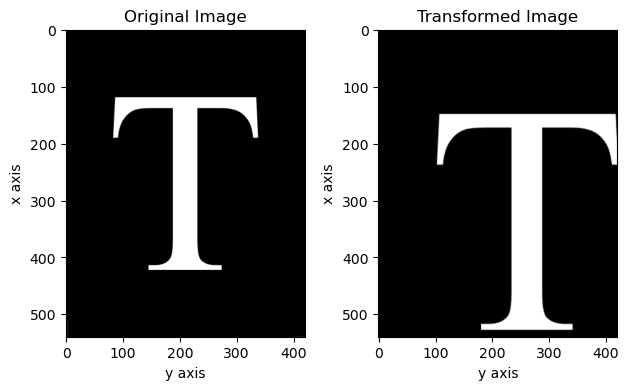

In [10]:
show(image, imScale)

## Reflection - Phản chiếu (Lật)
$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [11]:
matReflection = np.array([[1,0,0],[0,-1,0],[0,0,1]])
matReflection

array([[ 1,  0,  0],
       [ 0, -1,  0],
       [ 0,  0,  1]])

In [12]:
imReflection = ndimage.affine_transform(image, matReflection)

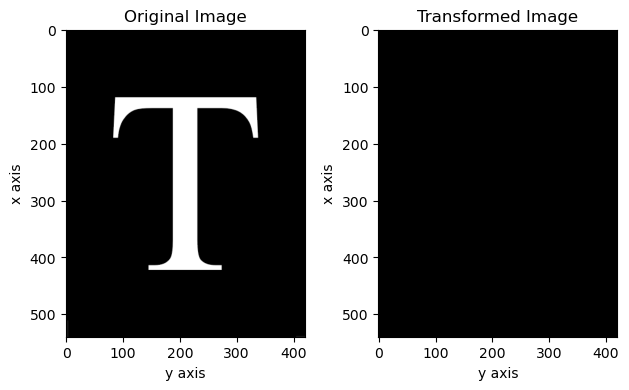

In [13]:
show(image, imReflection)

### Nên sử dụng reflection cùng với translation transformation matrix
$$\begin{bmatrix} 1 & 0 & 0 \\ 0 & -1 & Y \\ 0 & 0 & 1 \end{bmatrix}$$

In [34]:
# lấy chiều rộng width và chiều cao height của ảnh
wImage, hImage = image.shape

# Reflect about x-axis
matReflection  = np.array([[1,0,0],[0,-1,0],[0,0,1]]) 

# Translation in y-axis (horizontal)
matTranslation =  np.array([[1,0,0],[0,1,-wImage],[0,0,1]])

# Matrix multiplication
matRefTrans = matReflection @ matTranslation
matRefTrans

array([[  1,   0,   0],
       [  0,  -1, 540],
       [  0,   0,   1]])

In [35]:
imReflection = ndimage.affine_transform(image, matRefTrans)

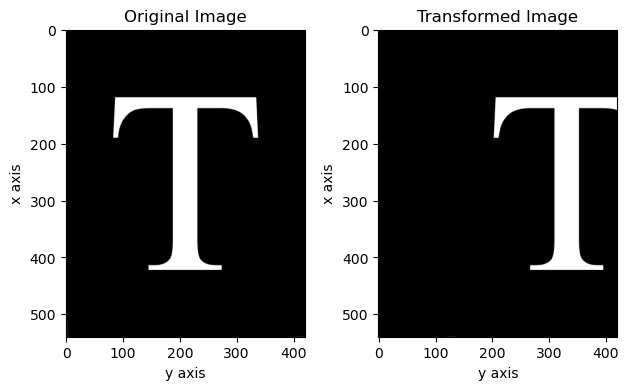

In [36]:
show(image, imReflection)

## Rotation
**Clockwise Rotation about Origin**

$$\begin{bmatrix} cos\theta & -sin\theta & 0 \\ sin\theta & cos\theta & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [17]:
# Rotation angle
theta = np.pi/6 # 180/6 = 30 degrees

In [18]:
# clockwais rotation about origin
matRotation = np.array([[np.cos(theta),-np.sin(theta),0],
                        [np.sin(theta),np.cos(theta),0],
                        [0,0,1]])
matRotation

array([[ 0.8660254, -0.5      ,  0.       ],
       [ 0.5      ,  0.8660254,  0.       ],
       [ 0.       ,  0.       ,  1.       ]])

In [19]:
imRotation = ndimage.affine_transform(image, matRotation)

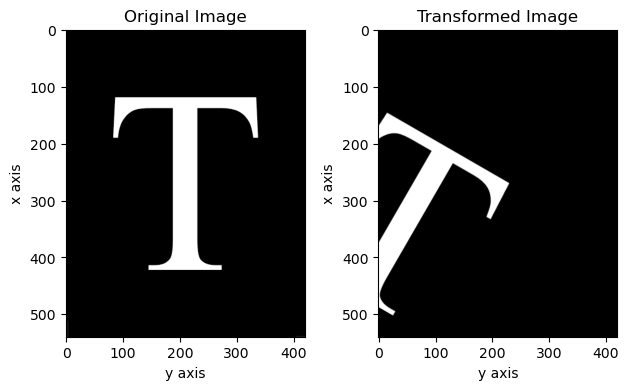

In [20]:
show(image, imRotation)

## Translation
$$\begin{bmatrix} 1 & 0 & Tx \\ 0 & 1 & Ty \\ 0 & 0 & 1 \end{bmatrix}$$

In [21]:
matTranslation = np.array([[1,0,-30],
                           [0,1,-70],
                           [0,0,1]])
matTranslation

array([[  1,   0, -30],
       [  0,   1, -70],
       [  0,   0,   1]])

In [22]:
imTranslation = ndimage.affine_transform(image, matTranslation)

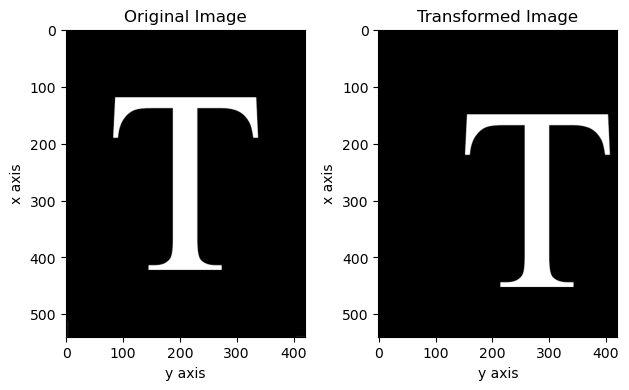

In [23]:
show(image, imTranslation)

## Shear (vertical)
$$\begin{bmatrix} 1 & Sv & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [24]:
# shear in y axis
matShear = np.array([[1,-0.40,0],[0,1,0],[0,0,1]])
matShear

array([[ 1. , -0.4,  0. ],
       [ 0. ,  1. ,  0. ],
       [ 0. ,  0. ,  1. ]])

In [25]:
imShearY = ndimage.affine_transform(image, matShear)

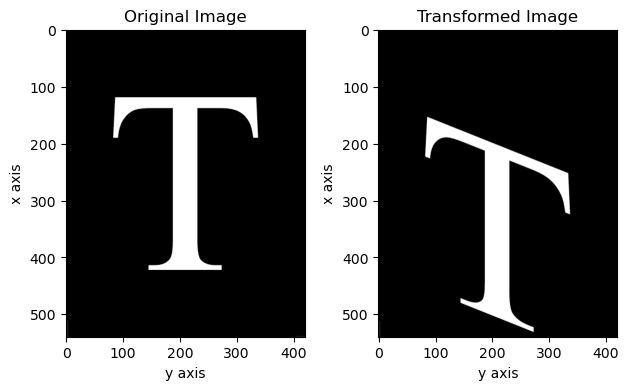

In [26]:
show(image, imShearY)

## Shear (horizontal)
$$\begin{bmatrix} 1 & 0 & 0 \\ Sv & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$

In [27]:
matShear = np.array([[1,0,0],[-0.4,1,0],[0,0,1]])
matShear

array([[ 1. ,  0. ,  0. ],
       [-0.4,  1. ,  0. ],
       [ 0. ,  0. ,  1. ]])

In [28]:
imShearX = ndimage.affine_transform(image, matShear)

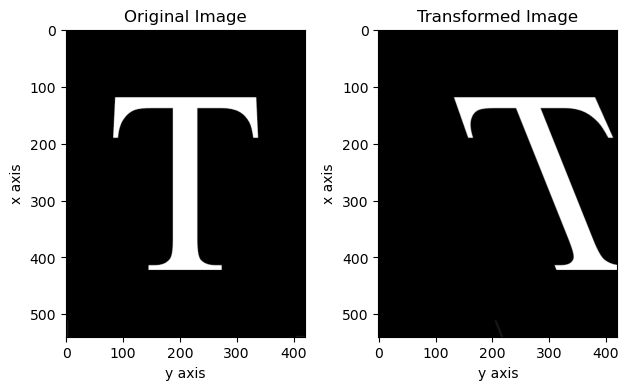

In [29]:
show(image, imShearX)